In [16]:
# Auto Insurance Claim Frequency Modeling in R

# Goal:
# - Model expected number of claims based on driver age
# - Understand how driver age affects risk
# - Would make sense for number of claims to reduce with age

In [17]:
# Load Data
mydata <- read.csv("../datasets/GLM_example.csv")
df <- as.data.frame(mydata)

In [18]:
# Limit data down to what we want to analyze
df <- df[, c("ClaimNb", "Exposure", "DrivAge")]

In [19]:
# Inspect the data
head(df)
str(df)

,ClaimNb,Exposure,DrivAge
,<int>,<dbl>,<int>
1,0,0.10,55
2,0,0.77,55
3,0,0.75,52
4,0,0.09,46
5,0,0.84,46
6,0,0.52,38


'data.frame':	678013 obs. of  3 variables:
 $ ClaimNb : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Exposure: num  0.1 0.77 0.75 0.09 0.84 0.52 0.45 0.27 0.71 0.15 ...
 $ DrivAge : int  55 55 52 46 46 38 38 33 33 41 ...


In [8]:
# Fit a Poisson regression, since 
# Modeling the expected number of claims per policy as a function of driver age
# Exposure is % of time insured in the year
model <- glm(ClaimNb ~ DrivAge + offset(log(Exposure)),
             data = df,
             family = poisson())

In [9]:
# Summarize the model
summary(model)


Call:
glm(formula = ClaimNb ~ DrivAge + offset(log(Exposure)), family = poisson(), 
    data = df)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.1359358  0.0207943 -102.72   <2e-16 ***
DrivAge     -0.0102320  0.0004403  -23.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 171320  on 678012  degrees of freedom
Residual deviance: 170768  on 678011  degrees of freedom
AIC: 221535

Number of Fisher Scoring iterations: 6


In [10]:
# So each year of age reduces claim frequency by about 1.023%
# Also p-value of DrivAge is very low, so it is significant in predicting number of claims

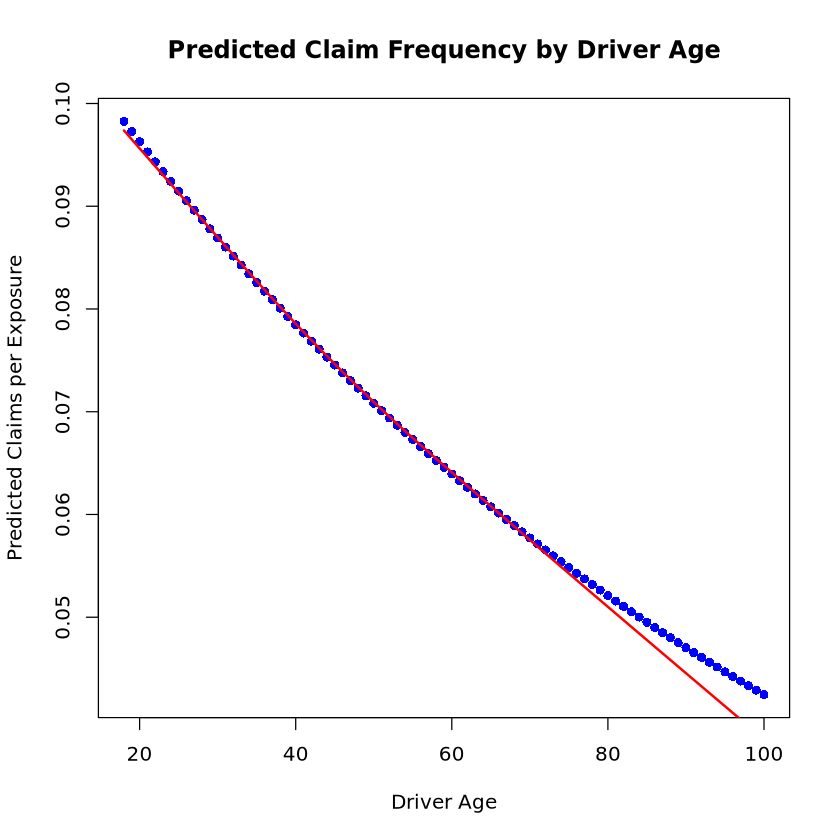

In [15]:
df$predicted_freq <- predict(model, type = "response") / df$Exposure

plot(df$DrivAge, df$predicted_freq,
     main = "Predicted Claim Frequency by Driver Age",
     xlab = "Driver Age",
     ylab = "Predicted Claims per Exposure",
     pch = 16, col = "blue")

lines(lowess(df$DrivAge, df$predicted_freq), col = "red", lwd = 2)
